In [73]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import xlrd

# other utilities
from sklearn import datasets, preprocessing, metrics

In [74]:
import requests

def readApi(url, params, headers):
    return str(requests.get(url, params, headers=headers).json())

In [75]:
import os
import json

In [76]:
# https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m,precipitation_probability,precipitation&timezone=Europe%2FBerlin&start_date={startDate}&end_date={endDate}&format=flatbuffers

# lyngby lat:55.775 - lon:12.501944
lat = 55.775
lon = 12.501944
# year month date. Format: YYYY-MM-DD
startDate = "2024-01-02"
endDate = "2024-02-06"

url = "https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m,precipitation_probability,precipitation&timezone=Europe%2FBerlin&start_date={startDate}&end_date={endDate}".format(lat=lat, lon=lon, endDate=endDate, startDate=startDate)

response = readApi(url, None, None).replace('\'', '"')
response_json = json.loads(response)

In [77]:
response_json

{'latitude': 55.775257,
 'longitude': 12.500397,
 'generationtime_ms': 0.11992454528808594,
 'utc_offset_seconds': 3600,
 'timezone': 'Europe/Berlin',
 'timezone_abbreviation': 'CET',
 'elevation': 28.0,
 'hourly_units': {'time': 'iso8601',
  'temperature_2m': '°C',
  'precipitation_probability': '%',
  'precipitation': 'mm'},
 'hourly': {'time': ['2024-01-02T00:00',
   '2024-01-02T01:00',
   '2024-01-02T02:00',
   '2024-01-02T03:00',
   '2024-01-02T04:00',
   '2024-01-02T05:00',
   '2024-01-02T06:00',
   '2024-01-02T07:00',
   '2024-01-02T08:00',
   '2024-01-02T09:00',
   '2024-01-02T10:00',
   '2024-01-02T11:00',
   '2024-01-02T12:00',
   '2024-01-02T13:00',
   '2024-01-02T14:00',
   '2024-01-02T15:00',
   '2024-01-02T16:00',
   '2024-01-02T17:00',
   '2024-01-02T18:00',
   '2024-01-02T19:00',
   '2024-01-02T20:00',
   '2024-01-02T21:00',
   '2024-01-02T22:00',
   '2024-01-02T23:00',
   '2024-01-03T00:00',
   '2024-01-03T01:00',
   '2024-01-03T02:00',
   '2024-01-03T03:00',
   '2024-

<Axes: xlabel='time'>

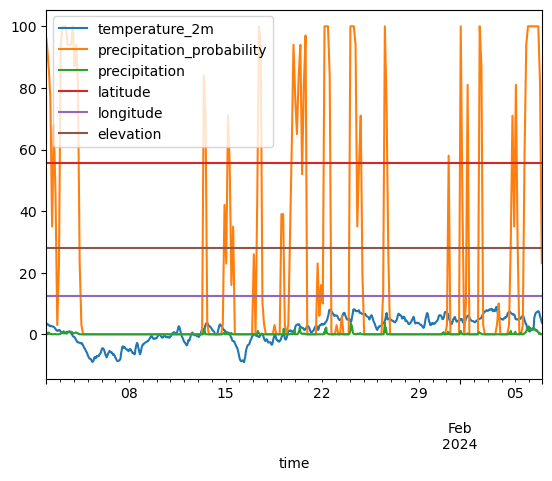

In [80]:
hourly = {
    "time": pd.to_datetime(response_json["hourly"]["time"]),
    "temperature_2m": response_json["hourly"]["temperature_2m"],
    "precipitation_probability": response_json["hourly"]["precipitation_probability"],
    "precipitation": response_json["hourly"]["precipitation"],
    "latitude": response_json["latitude"],
    "longitude": response_json["longitude"],
    "elevation": response_json["elevation"]
}
df = pd.DataFrame(hourly)
df.plot(x="time")